In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('data/Station_lat_lng.csv', encoding='gb2312')
df.head()

,STATIONID,STATIONCNNAME,STATIONENABBRNAME,STATIONTYPE,VIRTUALFLAG,ENABLEFLAG,ROWFLAG,CREATIONTIME,STATIONCNABBRNAME,lng,lat,lng_lat
0,1,奥体中心,OLYMPIC STADIUM,0,0,1,1,41834.41839,AT,118.724648,32.014641,"118.724648,32.014641"
1,2,元通,YUANTONG,1,0,1,1,41834.42017,YT,118.728019,32.001636,"118.728019,32.001636"
2,3,中胜,ZHONGSHENG,0,0,1,1,41834.42063,ZS,118.740078,31.993863,"118.740078,31.993863"
3,4,小行,XIAOHANG,0,0,1,1,41834.42095,XH,118.750965,31.988061,"118.750965,31.988061"
4,5,安德门,ANDEMEN,1,0,1,1,41737.57271,ADM,118.768408,31.997111,"118.768408,31.997111"


In [3]:
G = nx.Graph()

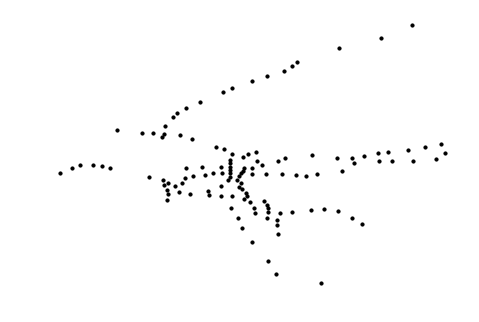

In [4]:
for i, row in df.iterrows():
    G.add_node(row['STATIONID'], pos=(row['lng'], row['lat']))
nx.draw(G, pos=nx.get_node_attributes(G,'pos'), node_size=10, node_color='k')
plt.show()

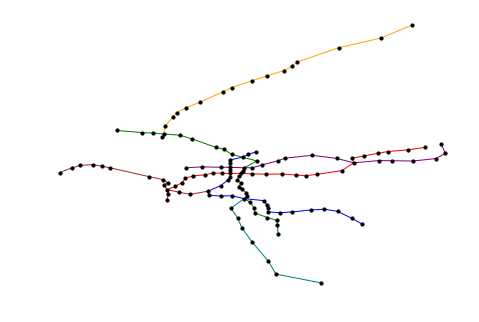

In [9]:
nid = df['STATIONID']
nid.index = df['STATIONENABBRNAME']
nid = nid.to_dict()

# note: more info available
line1 = ['Maigaoqiao','Hongshan Zoo','Nanjing Railway Station','Xinmofanmalu','Xuanwumen','Gulou','Zhujianglu','Xinjiekou','Zhangfuyuan','Sanshanjie','Zhonghuamen','Andemen','Tianlongsi','Ruanjiandadao','Huashenmiao','Nanjing South Railway Station','Shuanglongdadao','Hedingqiao','Shengtailu','Baijiahu','Xiaolongwan','Zhushanlu','Tianyindadao','Longmiandadao','NMU JIETT','NJCI','CPU']
# line has early terminus before Shengtailu

line2 = ['Youfangqiao','Yurundajie','Yuantong','Olympic Stadium East','Xinglongdajie','Jiqingmendajie','Yunjinlu','Mochouhu','Hanzhongmen','Shanghailu','Xinjiekou','Daxinggong','Xi\'anmen','Minggugong','Muxuyuan','Xiamafang','Xiaolingwei','Zhonglingjie','Maqun','Jinmalu','Xianhemen','Xuezelu','Xianlinzhongxin','Yangshangongyuan','NJU Xianlin Campus','Jingtianlu']
line3 = ['Linchang','Xinghuolu','SEU Chengxian College','Taifenglu','Tianruncheng','Liuzhoudonglu','Shangyuanmen','Wutangguangchang','Xiaoshi','Nanjing Railway Station','NFU Xinzhuang','Jimingsi','Fuqiao','Daxinggong','Changfujie','Fuzimiao','Wudingmen','Yuhuamen','Kazimen','Daminglu','Mingfaguangchang','Nanjing South Railway Station','Hongyundadao','Shengtaixilu','Tianyuanxilu','Jiulonghu','Chengxindadao','SEU Jiulonghu Campus','Mozhoudonglu']
# line has early terminus before Tianyuanxilu

line4 = ['Longjiang','NUA JSSNU Caochangmen','Yunnanlu','Gulou','Jimingsi','Jiuhuashan','Gangzicun','Jiangwangmiao','Wangjiawan','Jubaoshan','Suning HQ Xuzhuang','Jinmalu','Huitonglu','Lingshan','Dongliu','Mengbei','Xiganghuashu','Xianlinhu']
line10 = ['Andemen','Xiaohang','Zhongsheng','Yuantong','Olympic Stadium','Mengdudajie','Lvboyuan','Jiangxinzhou','Linjiang','Pukouwanhuicheng','Nanjing Tech','Longhualu','Wendelu','Yushanlu']
lineS1 = ['Nanjing South Railway Station','Cuipingshan','HHU Fochengxilu','Jiyindadao','Zhengfangzhonglu','Xiangyulubei','Xiangyulunan','Lukou International Airport']
lineS8 = ['Taishanxincun','Taifenglu','Gaoxin Development Zone','NUIST','Xiejiadian','Dachang','Getang','Changlu','Huagongyuan','Luhe Development Zone','Longchi','Xiongzhou','Fenghuangshan Park','Fangzhouguangchang','Shenqiao','Babaiqiao','Jinniuhu']
# line has early terminus at Shenqiao

lines = [line1, line2, line3, line4, line10, lineS1, lineS8]
line_color = ['blue', 'red', 'green', 'purple', 'brown', 'teal', 'orange']

for k, line in enumerate(lines):
    for i in range(len(line)-1): # looking at sequential pairs so stop early
        a = nid[str.upper(line[i])]
        b = nid[str.upper(line[i+1])]
        G.add_edge(a, b)
        G[a][b]['color'] = line_color[k]
        
nx.draw(G, pos=nx.get_node_attributes(G,'pos'), node_size=10, node_color='k', edge_color=[G[u][v]['color'] for u,v in G.edges()])
plt.show()